## Plot Density Matrix

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import subprocess

In [2]:
def read_entropy_file(filename):
    with open(output_filename) as f:
        data = f.readlines()
    return float(data[0].strip("\n").split("=")[1].strip())

In [3]:
compiled_dir = f"..{os.sep}compiled"
data_dir = f"..{os.sep}data"
plot_dir = f"..{os.sep}plots"

In [4]:
program = f"{compiled_dir}{os.sep}density_matrix"

In [5]:
N = list(range(2, 11))
print(N)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [6]:
entropy = np.empty((len(N), len(N) + 2))
entropy[:] = np.nan

In [7]:
for idx1, n in enumerate(N):
    for idx2, m in enumerate(range(n + 1)):
        output_filename = f"{data_dir}{os.sep}density_mat_N{n}_M{m}.txt"
        output = subprocess.run(
            [
                program,
                "--type", "generic",
                "--N", str(n),
                "--M", str(m),
                "--output_filename", output_filename
            ],
            stdout=subprocess.PIPE
        )
        entropy[idx1, idx2] = read_entropy_file(output_filename)

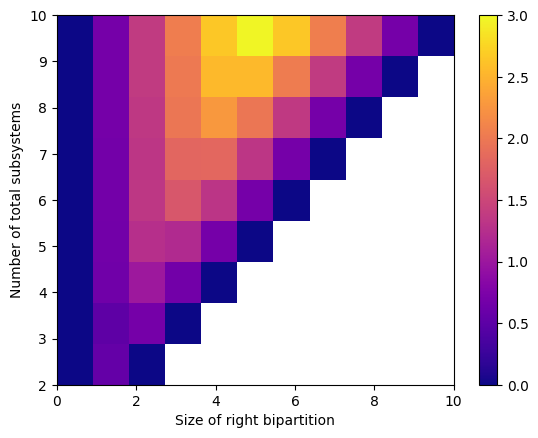

In [8]:
plt.imshow(
    entropy,
    origin="lower",
    extent=[0, 10, 2, 10],
    cmap="plasma",
    aspect="auto"
)
plt.xlabel("Size of right bipartition")
plt.ylabel("Number of total subsystems")
plt.colorbar()
plt.clim([0, 3]);

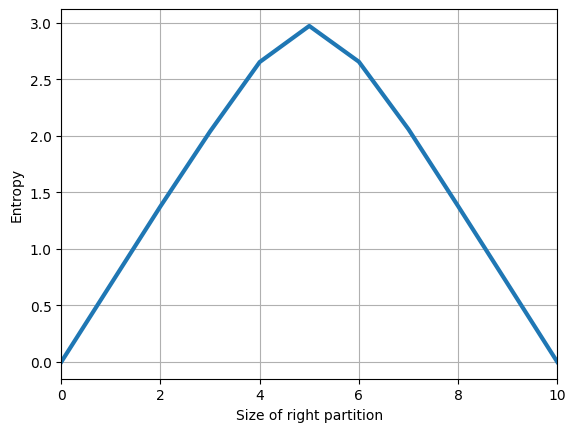

In [9]:
plt.plot(entropy[8], lw=3)
plt.xlim([0, 10])
plt.xlabel("Size of right partition")
plt.ylabel("Entropy")
plt.grid();